In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from lvl.datasets import poisson_lorenz
data, rates, readout, latents = poisson_lorenz(
    1000, 3000, latent_noise_scale=1.0, min_rate=0.1, max_rate=2.0, dt=0.005)

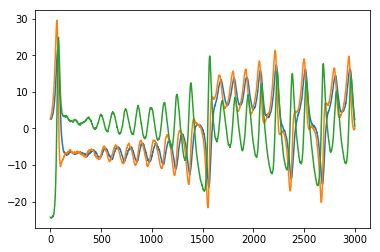

In [3]:
plt.plot(latents)

In [4]:
from lvl.factor_models import PoissonMF

model = PoissonMF(n_components=3)
model.fit(data.T)

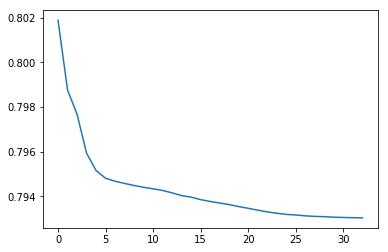

In [5]:
plt.plot(model.loss_hist[1:])

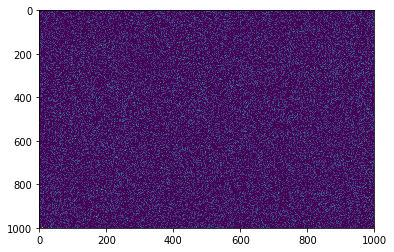

In [6]:
srt_data = data[np.lexsort(readout)]

plt.imshow(srt_data, aspect='auto')

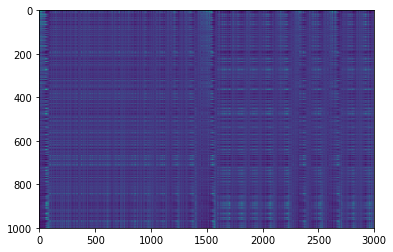

In [7]:
srt_pred = model.predict()[np.lexsort(readout)]

plt.imshow(srt_pred, aspect='auto')

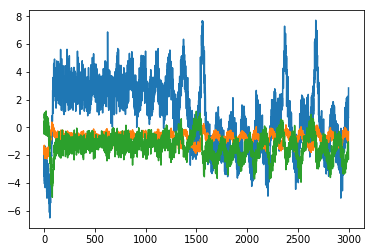

In [8]:
from scipy.ndimage import gaussian_filter1d
plt.plot(model.factors[1].T)

In [13]:
from lvl.basis_funcs import truncated_fourier
rdata, S = truncated_fourier(data.T, 100)

In [14]:
model.fit(data.T, Vbasis=S)

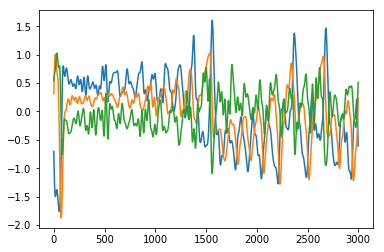

In [15]:
from scipy.ndimage import gaussian_filter1d
plt.plot(np.dot(model.factors[1], S).T)